The movies dataset -> https://www.kaggle.com/rounakbanik/the-movies-dataset

In [8]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
DATA_DIR = Path('../data')
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

In [12]:
raw_ratings_df = pd.read_csv('ratings_small.csv')
raw_movies_df = pd.read_csv('movies_metadata.csv')
display(raw_ratings_df.sample(5))
raw_movies_df.sample(5)

C:\Users\choha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,userId,movieId,rating,timestamp
78046,544,1222,5.0,1435787230
66920,468,74545,3.0,1296194271
33793,242,1961,5.0,956686799
50180,367,35957,3.0,1128630983
22136,153,306,5.0,1046740081


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
33336,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.facebook.com/filmensvend,85616,tt2094949,da,Svend,"For two years, director Anne Wivel and her cam...",...,2011-11-25,0.0,110.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Svend,False,4.5,3.0
28721,False,NaN,0,[],NaN,38445,tt1059233,en,The Strength of Water,When a mysterious stranger arrives in their is...,...,2009-08-27,0.0,86.0,[],Released,NaN,The Strength of Water,False,6.5,2.0
26495,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,16997,tt1013651,en,The Man Who Came Back,"Framed for murder and left for dead, a local l...",...,2008-02-08,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Man Who Came Back,False,6.0,2.0
37007,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,199283,tt0349116,ru,Бабуся,"An old Russian grandmother or ""babushka"", who ...",...,2004-02-03,0.0,97.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Babushka,False,5.5,6.0
34226,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,224815,tt2881698,en,Skinwalker Ranch,In 2010 “Skinwalker Ranch” gained media atten...,...,2013-10-30,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There is a place The Unexplained calls home,Skinwalker Ranch,False,5.0,47.0


## Column types

In [13]:
raw_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [14]:
raw_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- Timestamp is the time when the ... so we need to convert it to datetime

## Missing Values

In [15]:
raw_ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Distribution

### Ratings

In [16]:
raw_ratings_df.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

C:\Users\choha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

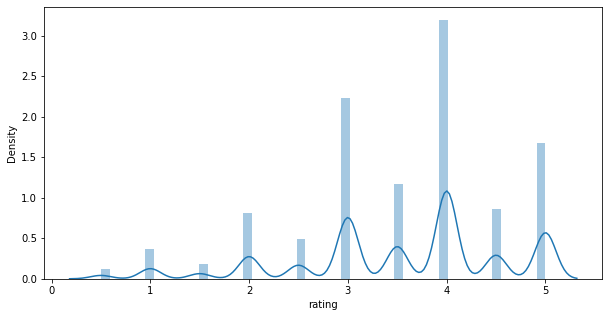

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(raw_ratings_df.rating)

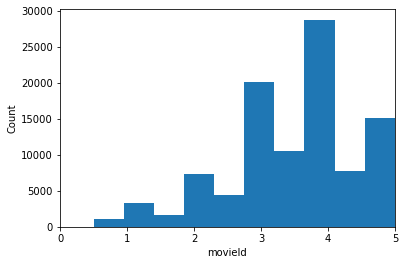

In [22]:
plt.hist(raw_ratings_df['rating'])
plt.xlabel('movieId')
plt.ylabel('Count')
plt.xlim((0, 5))
plt.show()

C:\Users\choha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

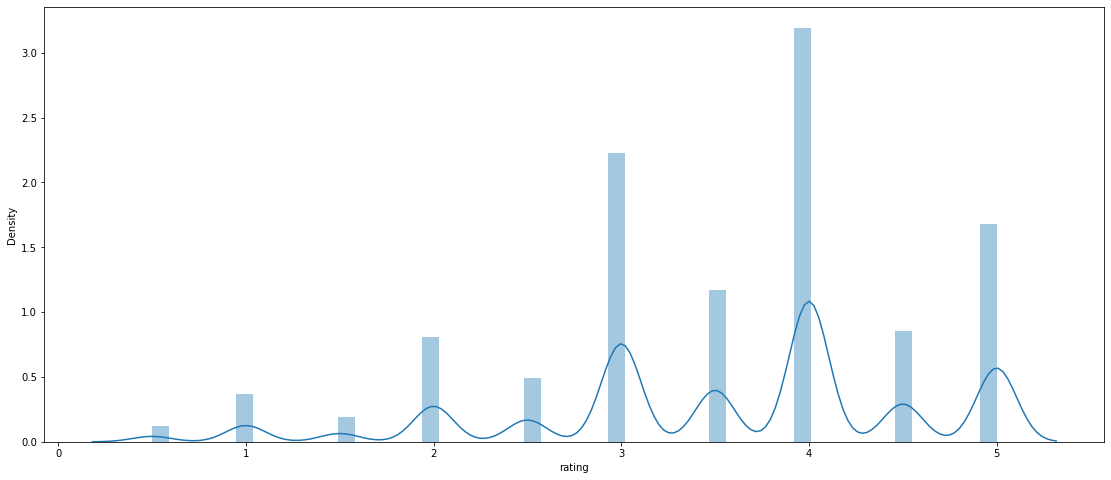

In [23]:
plt.figure(figsize=(19,8))

sns.distplot(raw_ratings_df['rating'])

<AxesSubplot:xlabel='rating', ylabel='timestamp'>

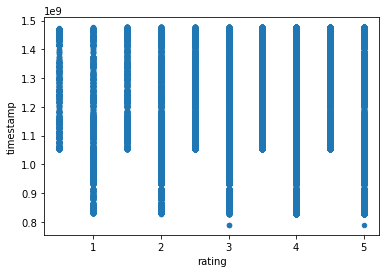

In [26]:
raw_ratings_df.plot.scatter(x='rating',y='timestamp')

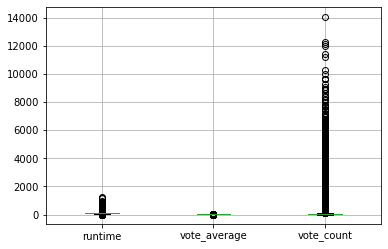

In [27]:
raw_movies_df[['imdb_id', 'runtime', 'vote_average', 'vote_count']].boxplot()
plt.show()